In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, log_loss
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif

from xgboost import XGBClassifier

import shap
shap.initjs()


In [2]:
# 실수형 데이터 모음
float_data = [
    'age','ainc','DI1_ag',
    'DI2_ag','DI3_ag','DI5_ag',
    'DI6_ag','DM2_ag','DM3_ag',
    'DM4_ag','DJ2_ag','DJ4_ag',
    'DE2_ag','DE1_ag','DC1_ag',
    'DC2_ag','DC3_ag','DC4_ag',
    'DC5_ag','DC6_ag','DC7_ag',
    'DC11_ag','DC12_ag','DF2_ag',
    'DL1_ag','DJ8_ag','DJ6_ag',
    'DH4_ag','DH2_ag','DH3_ag',
    'DH6_ag','DH7_ag','DN1_ag',
    'DK8_ag','DK9_ag','DK4_ag',
    'DM8_ag','DF1_ya','DJ9_ya',
    'LQ1_mn','LQ2_mn','EQ5D',
    'AC3','AC3_1_01','AC3_1_02',
    'AC3_1_03','AC3_1_04','AC3_1_05',
    'AC3_2_01','AC3_2_02','AC3_2_03',
    'AC3_2_04','AC3_2_05','ij_expr',
    'MH1_1','MO1_1','EC_wht_23',
    'BD2','BD2_14','BA2_2_2',
    'BA2_2_4','BA2_2_6','sc_seatblt',
    'sc_seatblt2','sc_seatblt3','BP16_1',
    'BP16_2','BP16_11','BP16_12',
    'BP16_13','BP16_14','BP16_21',
    'BP16_22','BP16_23','BP16_24',
    'mh_PHQ_S','mh_GAD_S','mh_stress',
    'BS2_1','BS2_2','BS3_2',
    'BS3_3','BS6_2','BS6_2_1',
    'BS6_2_2','BS6_3','BS6_4',
    'BS6_4_1','BS6_4_2','BS12_47_1',
    'BS12_47_2','BS2','BS10_2',
    'BS10_3','sm_presnt','BE3_72',
    'BE3_73','BE3_74','BE3_82',
    'BE3_83','BE3_84','BE3_92',
    'BE3_93','BE3_94','BE3_76',
    'BE3_77','BE3_78','BE3_86',
    'BE3_87','BE3_88','BE8_1',
    'BE8_2','BE3_32','BE3_33',
    'pa_aerobic','LW_mp_a','LW_ms_a',
    'LW_pr_1','LW_mt_a1','LW_mt_a2',
    'LW_br_ch','LW_br_dur','LW_br_yy',
    'LW_br_mm','HE_fst','HE_dprg',
    'HE_PLS_15','HE_PLS_30','HE_sbp1',
    'HE_dbp1','HE_sbp2','HE_dbp2',
    'HE_sbp3','HE_dbp3','HE_sbp',
    'HE_dbp','HE_ht','HE_wt',
    'HE_wc','HE_nc','HE_BMI',
    'HE_glu','HE_HbA1c','HE_insulin',
    'HE_chol','HE_HDL_st2','HE_TG',
    'HE_LDL_drct','HE_ast','HE_alt',
    'HE_HB','HE_HCT','HE_BUN',
    'HE_crea','HE_WBC','HE_RBC',
    'HE_Bplt','HE_Uacid','HE_df',
    'HE_dog','HE_cat','HE_birch',
    'HE_oak','HE_Jhop','HE_ragweed',
    'HE_Uph','HE_Usg','HE_Ucrea',
    'HE_Ualb','HE_Ukal','HE_Ucot',
    'HE_fvc','HE_fvcp','HE_fev1',
    'HE_fev1p','HE_fev1fvc','HE_fev6',
    'HE_fef25_75','HE_pef','HE_cough2',
    'HE_sput2','HE_PFTag','O_DTD',
    'O_DTP','O_DFTD','O_DMFTP',
    'O_IMP_UI','O_IMP_UM','O_IMP_LI',
    'O_IMP_LM','O_BR_N_U','O_BR_N_L',
    'GS_mea_r_1','GS_mea_r_2','GS_mea_r_3',
    'GS_mea_l_1','GS_mea_l_2','GS_mea_l_3',
    'T_HR500_RT','T_HR1000_RT','T_HR2000_RT',
    'T_HR4000_RT','T_HR8000_RT','T_HR500_LT',
    'T_HR1000_LT','T_HR2000_LT','T_HR4000_LT',
    'T_HR8000_LT','T_VHIT_GA_R','T_VHIT_GA_L',
    'E_Dr_dsph','E_Dr_dcyl','E_Dr_a',
    'E_Dl_dsph','E_Dl_dcyl','E_Dl_a',
    'E_Pr_1','E_Pl_1','IAQ_PM2_5',
    'IAQ_CO2','IAQ_HCHO','IAQ_TVOC',
    'IAQ_Benzene','IAQ_Toluene','IAQ_Ethylbenzene',
    'IAQ_Xylene','IAQ_Styrene','IAQ_PM2_5_atmos',
    'IAQ_01_Y','IAQ_01_M','IAQ_06_1N',
    'IAQ_06_2N','IAQ_06_3N','IAQ_08_1_1',
    'IAQ_11_2_1','IAQ_11_3H','IAQ_11_3M',
    'IAQ_13_1F','IAQ_13_2F','IAQ_13_3F',
    'IAQ_13_4F','IAQ_13_1H','IAQ_13_1M',
    'IAQ_13_2H','IAQ_13_2M','IAQ_13_3H',
    'IAQ_13_3M','IAQ_13_4H','IAQ_13_4M',
    'IAQ_22_1','IAQ_22_3','IAQ_23_2',
    'VOC_WKD_H','VOC_Ucrea','VOC_BMA',
    'VOC_BMA_cr','VOC_2MHA','VOC_2MHA_cr',
    'VOC_34MHA','VOC_34MHA_cr','VOC_PGA',
    'VOC_PGA_cr','VOC_MA','VOC_MA_cr',
    'VOC_SPMA','VOC_SPMA_cr','VOC_3HPMA',
    'VOC_3HPMA_cr','VOC_BPMA','VOC_BPMA_cr',
    'VOC_DHBMA','VOC_DHBMA_cr','Y_MTM_S1',
    'Y_MTM_S2','Y_MTM_D1','Y_MTM_D2',
    'Y_FM_S1','Y_FM_S2','Y_FM_D1',
    'Y_FM_D2','Y_MLK_ST','Y_WN_ST',
    'N_MEAL_T','NF_EN','NF_WATER',
    'NF_PROT','NF_FAT','NF_SFA',
    'NF_MUFA','NF_PUFA','NF_N3',
    'NF_N6','NF_10_0','NF_12_0',
    'NF_14_0','NF_16_0','NF_18_0',
    'NF_20_0','NF_22_0','NF_24_0',
    'NF_14_1','NF_16_1','NF_18_1',
    'NF_20_1','NF_22_1','NF_24_1',
    'NF_18_2N6','NF_18_3N3','NF_18_3N6',
    'NF_18_4','NF_20_2','NF_20_3N6',
    'NF_20_4N6','NF_20_5N3','NF_22_2',
    'NF_22_5','NF_22_6N3','NF_CHOL',
    'NF_CHO','NF_TDF','NF_SUGAR',
    'NF_CA','NF_PHOS','NF_NA',
    'NF_K','NF_MG','NF_FE',
    'NF_ZN','NF_VA_RAE','NF_VITD',
    'NF_VITE','NF_CAROT','NF_RETIN',
    'NF_B1','NF_B2','NF_NIAC',
    'NF_FOLATE','NF_VITC','N_WAT_C',
    'N_INTK','N_EN','N_WATER',
    'N_PROT','N_FAT','N_SFA',
    'N_MUFA','N_PUFA','N_N3',
    'N_N6','N_CHOL','N_CHO',
    'N_TDF','N_SUGAR','N_CA',
    'N_PHOS','N_NA','N_K',
    'N_MG','N_FE','N_ZN',
    'N_VA_RAE','N_VITD','N_VITE',
    'N_CAROT','N_RETIN','N_B1',
    'N_B2','N_NIAC','N_FOLATE',
    'N_VITC','LS_FQ','LS_CA',
    'LS_PHOS','LS_FE','LS_VA',
    'LS_B1','LS_B2','LS_NIAC',
    'LS_VITC','TLS_CA','TLS_PHOS',
    'TLS_FE','TLS_VA','TLS_B1',
    'TLS_B2','TLS_NIAC','TLS_VITC', 'pregnancy_count'
]


In [3]:
df_man = pd.read_csv('../data/hn_prepared_man.csv', encoding='UTF-8', low_memory=False)
df_woman = pd.read_csv('../data/hn_prepared_woman.csv', encoding='UTF-8', low_memory=False)

print(df_man.shape)
print(df_woman.shape)

(8270, 173)
(10241, 176)


In [4]:
all_columns_man = df_man.columns
all_columns_woman = df_woman.columns
# 실수형 열을 제외한 나머지 열을 범주형 열로 추출
categorical_data_man = [col for col in all_columns_man if col not in float_data  and col != 'diabetes']
categorical_data_woman = [col for col in all_columns_man if col not in float_data  and col != 'diabetes']

In [5]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 선택한 열에 대해 정규화 적합 및 변환
for col in float_data:
    try:
        df_man[col] = scaler.fit_transform(df_man[col].values.reshape(-1, 1)).flatten()
        df_woman[col] = scaler.fit_transform(df_woman[col].values.reshape(-1, 1)).flatten()
    except KeyError:
        pass

In [7]:
# 프로파일링 보고서 생성
profile = ProfileReport(df_man, title="Profiling Report man")
# 보고서 저장 (선택사항)
profile.to_file("../resources/Profiling Report man.html")

# 보고서를 Jupyter Notebook에서 표시
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\flinter\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
c:\Users\flinter\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
c:\Users\flinter\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# 프로파일링 보고서 생성
profile = ProfileReport(df_woman, title="Profiling Report woman")
# 보고서 저장 (선택사항)
profile.to_file("../resources/Profiling Report woman.html")

# 보고서를 Jupyter Notebook에서 표시
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\flinter\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
c:\Users\flinter\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
c:\Users\flinter\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# 남자
y_man = df_man.diabetes
X_man = df_man.drop('diabetes', axis=1)

# 여자
y_woman = df_woman['diabetes']
X_woman = df_woman.drop('diabetes', axis=1)

In [10]:
# # 상관관계, VIF, 변수 중요도 측정을 위한 함수 정의
# def calculate_vif(df):
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = df.columns
#     vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
#     return vif_data

# def calculate_feature_importance(X, y):
#     model = XGBClassifier()
#     model.fit(X, y)
#     importance = pd.DataFrame()
#     importance['feature'] = X.columns
#     importance['importance'] = model.feature_importances_
#     return importance

# # 상관관계 분석 후 변수 제거
# correlation_matrix = X_man.corr().abs()
# upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# to_drop_correlation = [column for column in upper_tri.columns if any(upper_tri[column] > 0.3)]

# # VIF 계산 후 변수 제거
# vif = calculate_vif(X_man)
# to_drop_vif = vif[vif["VIF"] > 10]["feature"].tolist()

# # 변수 중요도 측정 후 변수 제거
# importance = calculate_feature_importance(X_man, y_man)
# to_drop_importance = importance[importance["importance"] < 0.0001]["feature"].tolist()

# # 중복을 제외한 모든 제거 대상 변수를 합침
# to_drop = list(set(to_drop_correlation + to_drop_vif + to_drop_importance))

# # 모든 제거 대상 변수를 한 번에 삭제
# X_man = X_man.drop(columns=to_drop)

In [11]:
# # 상관관계 분석 후 변수 제거
# correlation_matrix = X_woman.corr().abs()
# upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# to_drop_correlation = [column for column in upper_tri.columns if any(upper_tri[column] > 0.3)]

# # VIF 계산 후 변수 제거
# vif = calculate_vif(X_woman)
# to_drop_vif = vif[vif["VIF"] > 10]["feature"].tolist()

# # 변수 중요도 측정 후 변수 제거
# importance = calculate_feature_importance(X_woman, y_woman)
# to_drop_importance = importance[importance["importance"] < 0.0001]["feature"].tolist()

# # 중복을 제외한 모든 제거 대상 변수를 합침
# to_drop = list(set(to_drop_correlation + to_drop_vif + to_drop_importance))

# # 모든 제거 대상 변수를 한 번에 삭제
# X_woman = X_woman.drop(columns=to_drop)

In [12]:
def calculate_vif(df, idx):
    # VIF는 해당 변수(idx)에 대해 계산
    return variance_inflation_factor(df.values, idx)

def calculate_feature_importance(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    importance = pd.Series(model.feature_importances_, index=X.columns)
    return importance

def process_features(X, y, corr_threshold=0.3, vif_threshold=10, importance_threshold=0.0001):
    # 상관관계, VIF, 중요도를 기준으로 변수 제거
    columns = X.columns.tolist()
    for col in columns:
        if col not in X.columns:
            continue

        # 1. 상관관계 기준 검사
        correlation_matrix = X.corr().abs()
        if any(correlation_matrix[col].drop(col) > corr_threshold):
            X = X.drop(columns=[col])
            continue

        # 2. VIF 기준 검사
        vif = calculate_vif(X, X.columns.get_loc(col))
        if vif > vif_threshold:
            X = X.drop(columns=[col])
            continue

        # 3. 변수 중요도 기준 검사
        importance = calculate_feature_importance(X, y)
        if importance[col] < importance_threshold:
            X = X.drop(columns=[col])

    return X

In [13]:
X_man = process_features(X_man, y_man)

c:\Users\flinter\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [14]:
X_woman = process_features(X_woman, y_woman)

c:\Users\flinter\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [15]:
print(len(X_man.columns))
print(X_man.columns)
print("==============================")
print(len(X_woman.columns))
print(X_woman.columns)

45
Index(['live_t', 'heart', 'bone', 'asthma', 'allergic_rhinitis', 'Cataract',
       'gout', 'mt_nontrt', 'AC1_yr', 'accident', 'BP6_10', 'mh_stress',
       'sm_presnt', 'pa_aerobic', 'HE_insulin', 'HE_TG', 'HE_alt', 'HE_Uph',
       'HE_Uglu', 'HE_Uket', 'HE_Ubld', 'HE_Uro', 'HE_UNa', 'HE_Ualb',
       'HE_Ukal', 'O_pain', 'O_ortho', 'L_LN_FQ', 'L_OUT_FQ', 'N_VITC',
       'HEI_DAIRY', 'HEI_NA', 'HEI_SUGAR', 'married', 'd_weight',
       'heavy_drink', 'bloodpressure', 'hyper_chol', 'genetic_hbp',
       'genetic_hl', 'genetic_heart', 'genetic_cva', 'genetic_diabetes',
       'genetic_thy', 'genetic_hepa_b'],
      dtype='object')
40
Index(['town_t', 'live_t', 'stroke', 'heart', 'allergic_rhinitis', 'Cataract',
       'hepatitis_b', 'mt_nontrt', 'accident', 'BP6_10', 'mh_stress',
       'sm_presnt', 'pa_aerobic', 'HE_insulin', 'HE_TG', 'HE_alt', 'HE_crea',
       'HE_Uph', 'HE_Unitr', 'HE_Uglu', 'HE_Ubld', 'HE_Ualb', 'HE_Ukal',
       'O_pain', 'O_ortho', 'L_LN_FQ', 'N_VITC', 'HEI_

In [16]:
temp_man = pd.DataFrame()
temp_man = pd.concat([X_man, y_man], ignore_index=True)

# 프로파일링 보고서 생성
profile = ProfileReport(temp_man, title="Profiling Report man after")
# 보고서 저장 (선택사항)
profile.to_file("../resources/Profiling Report man after.html")

# 보고서를 Jupyter Notebook에서 표시
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\flinter\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\flinter\anaconda3\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
temp_woman = pd.DataFrame()
temp_woman = pd.concat([X_woman, y_woman], ignore_index=True)

# 프로파일링 보고서 생성
profile = ProfileReport(temp_woman, title="Profiling Report woman after")
# 보고서 저장 (선택사항)
profile.to_file("../resources/Profiling Report woman after.html")

# 보고서를 Jupyter Notebook에서 표시
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\flinter\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\flinter\anaconda3\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
all_columns_man = X_man.columns
all_columns_woman = X_woman.columns
# 실수형 열을 제외한 나머지 열을 범주형 열로 추출
categorical_data_man = [col for col in all_columns_man if col not in float_data  and col != 'diabetes']
categorical_data_woman = [col for col in all_columns_woman if col not in float_data  and col != 'diabetes']

In [66]:
# 남성 데이터셋 분할
X_man_train, X_man_test, y_man_train, y_man_test = train_test_split(X_man, y_man, test_size=0.2, random_state=0)

X_man_train.reset_index(drop=True, inplace=True)
X_man_test.reset_index(drop=True, inplace=True)
y_man_train.reset_index(drop=True, inplace=True)
y_man_test.reset_index(drop=True, inplace=True)

# 여성 데이터셋 분할
X_woman_train, X_woman_test, y_woman_train, y_woman_test = train_test_split(X_woman, y_woman, test_size=0.2, random_state=0)

X_woman_train.reset_index(drop=True, inplace=True)
X_woman_test.reset_index(drop=True, inplace=True)
y_woman_train.reset_index(drop=True, inplace=True)
y_woman_test.reset_index(drop=True, inplace=True)

c:\Users\flinter\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


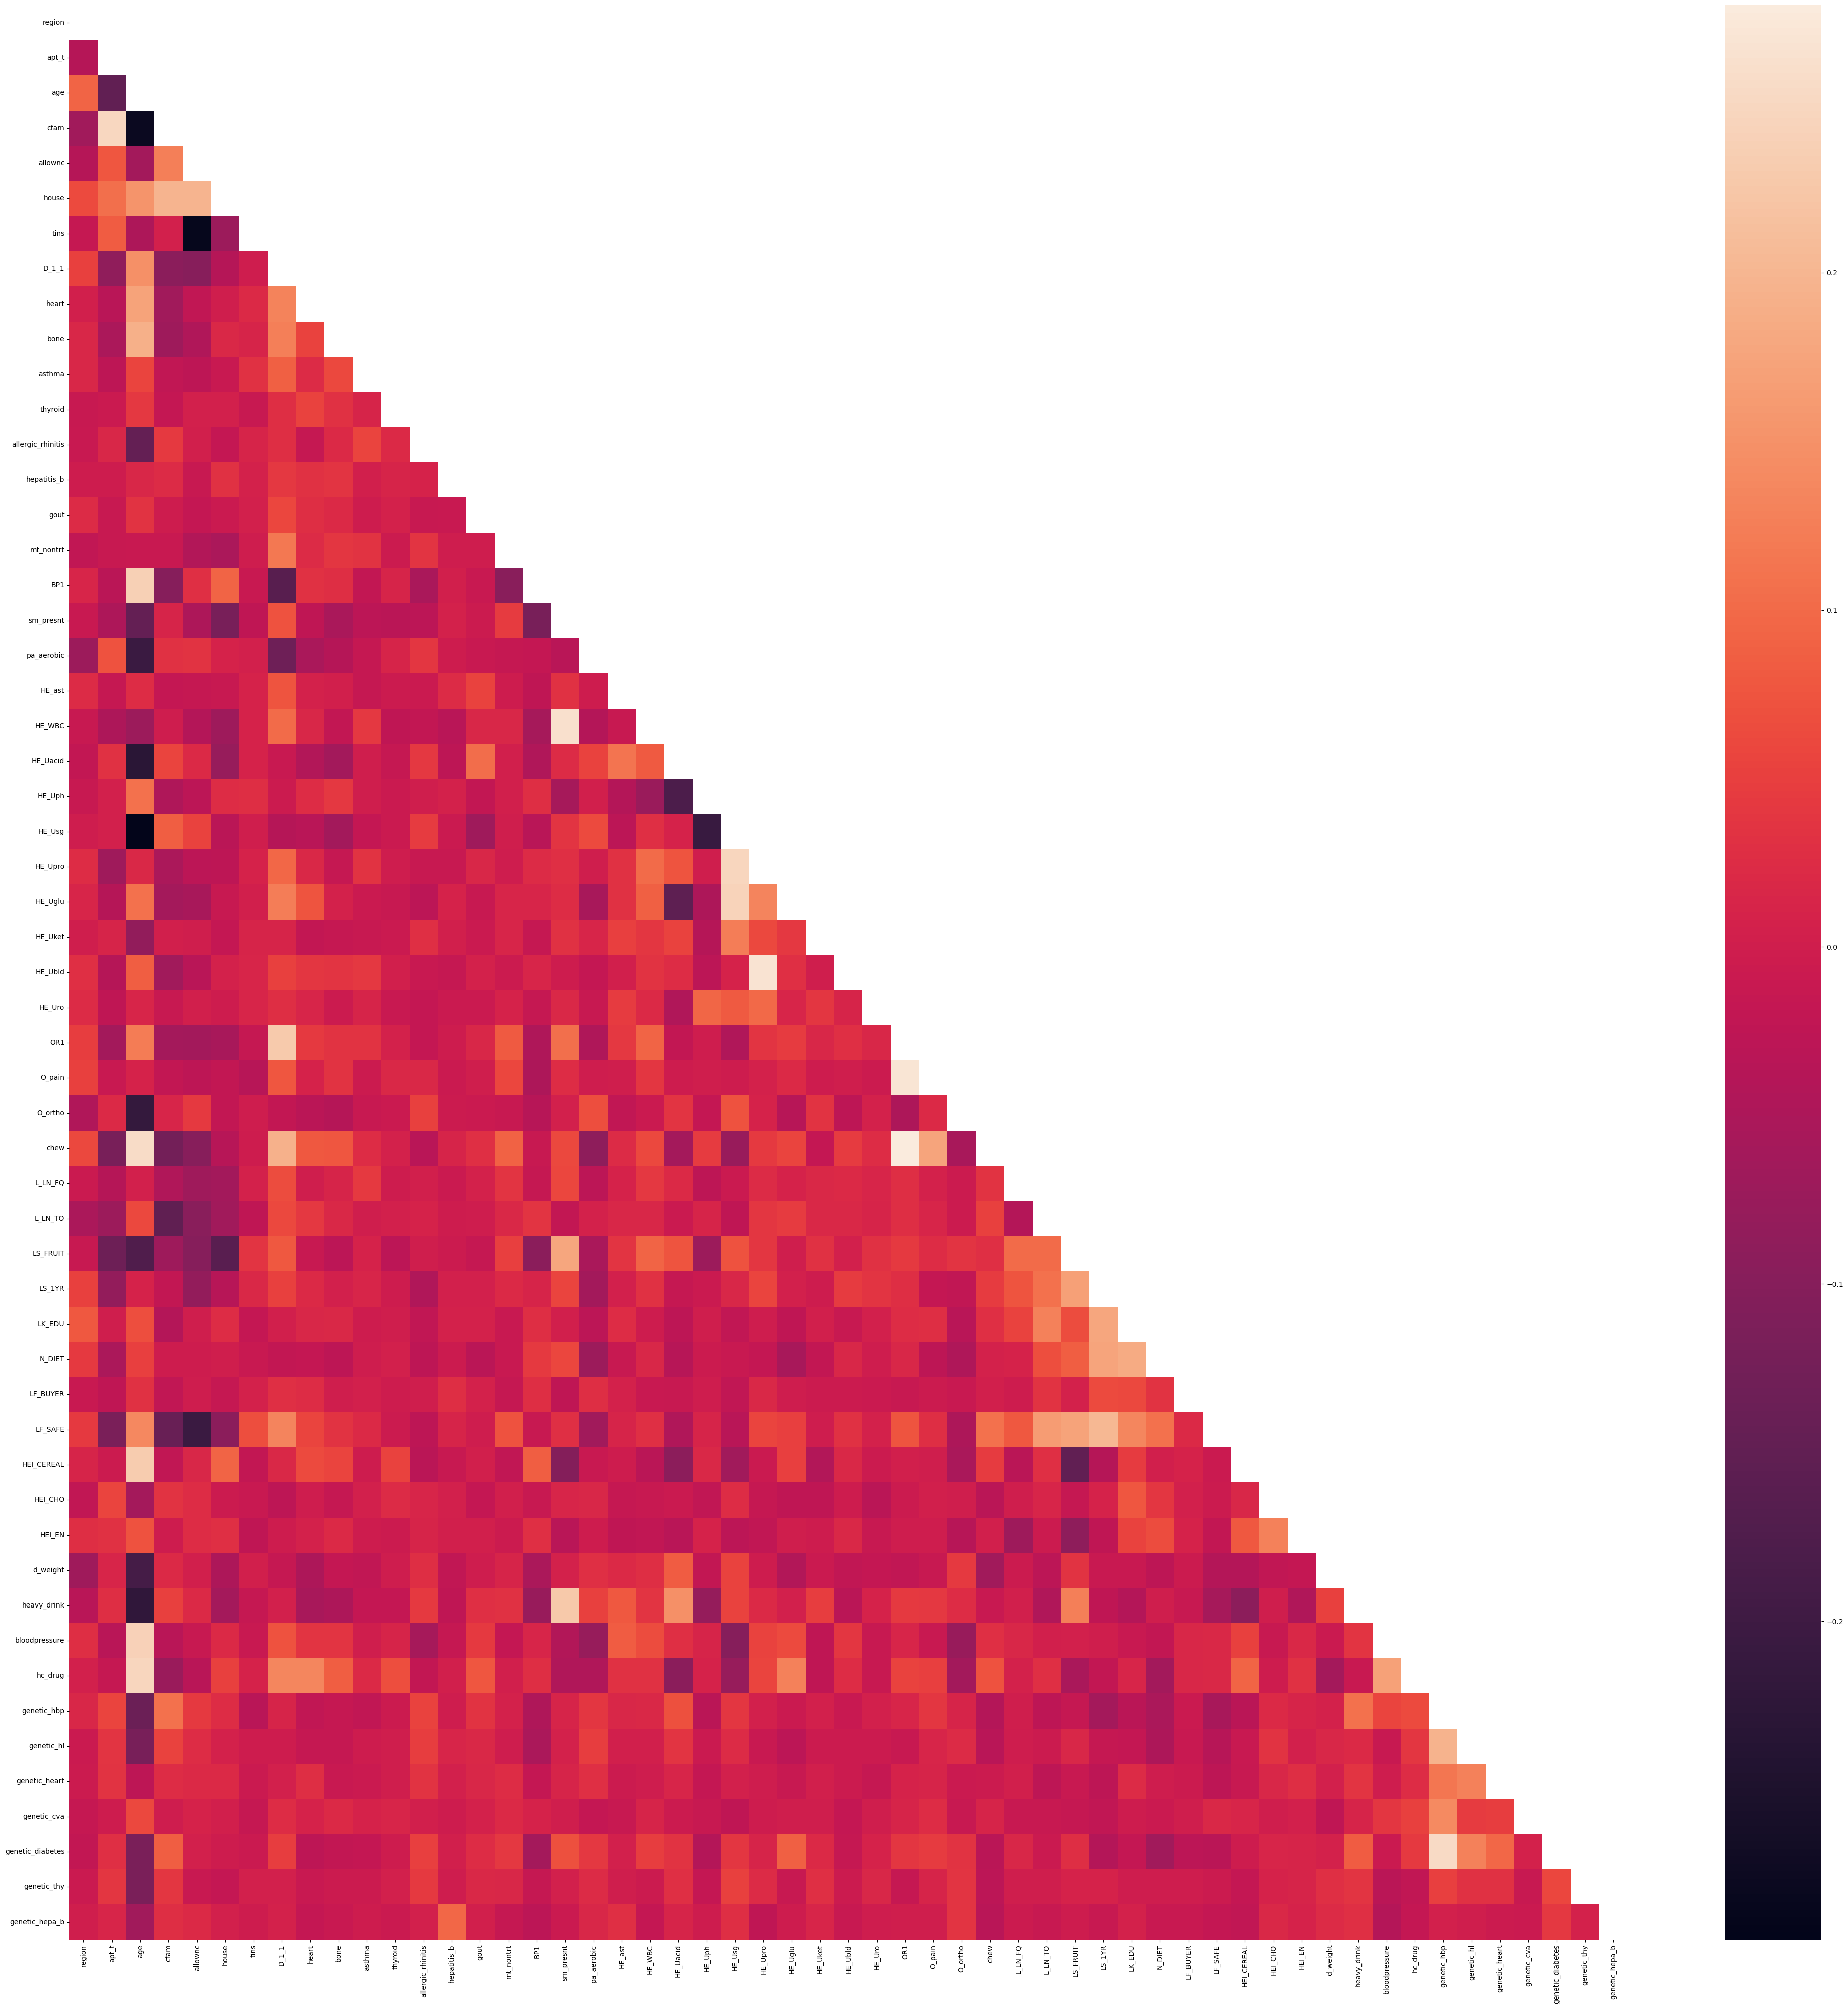

In [94]:
# 히트맵 그리기
plt.figure(figsize=(50, 50))
mask = np.triu(np.ones_like(X_man.corr(), dtype=bool))  # 대각선 아래 부분에만 True가 되도록 마스크 생성
sns.heatmap(X_man.corr(), annot=True, mask=mask, fmt=".2f")  # annot=True로 하여 숫자 표시, fmt=".2f"로 소수점 두 자리까지 표시
plt.savefig('../resources/heatmap_man.png')
plt.show()

c:\Users\flinter\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


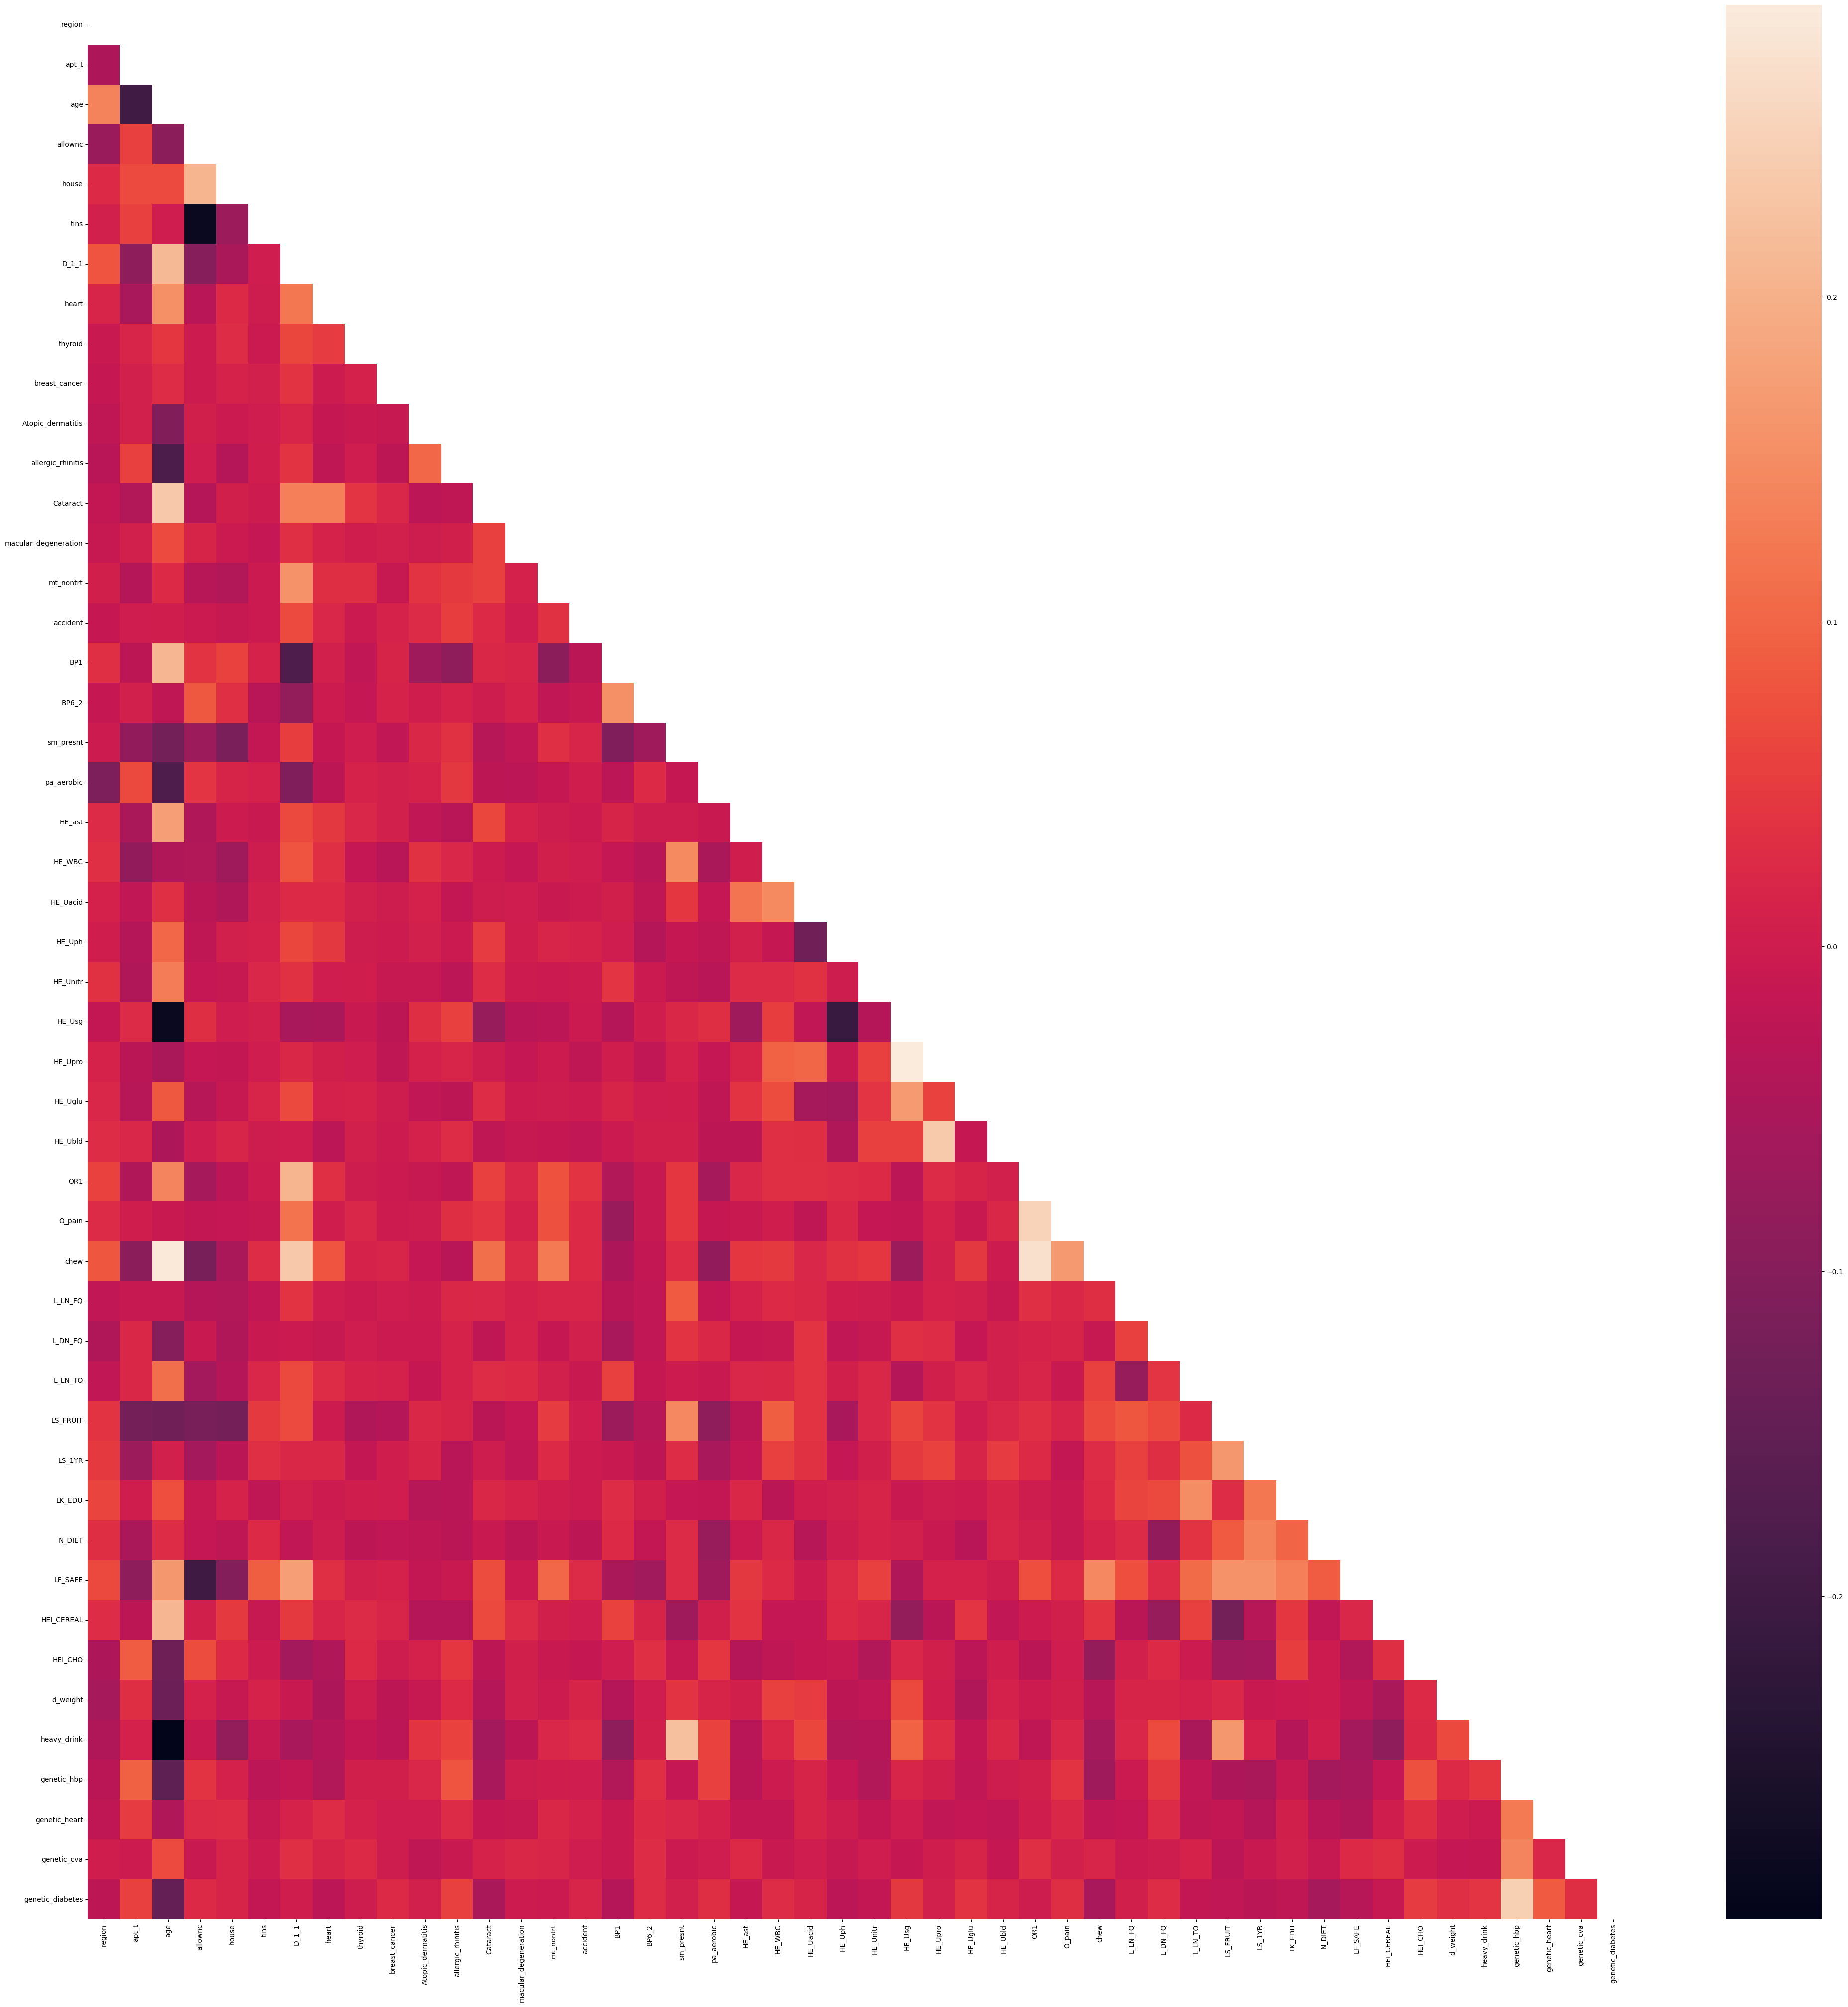

In [95]:
# 히트맵 그리기
plt.figure(figsize=(50, 50))
mask = np.triu(np.ones_like(X_woman.corr(), dtype=bool))  # 대각선 아래 부분에만 True가 되도록 마스크 생성
sns.heatmap(X_woman.corr(), annot=True, mask=mask, fmt=".2f")  # annot=True로 하여 숫자 표시, fmt=".2f"로 소수점 두 자리까지 표시
plt.savefig('../resources/heatmap_woman.png')
plt.show()

In [67]:
# SMOTE-NC를 적용할 훈련 데이터에 대한 범주형 열의 인덱스 생성
categorical_indices_man = [X_man_train.columns.get_loc(col) for col in categorical_data_man]

# SMOTE-NC 적용
smote_nc_man = SMOTENC(categorical_features=categorical_indices_man, random_state=0)
X_train_resampled_man, y_train_resampled_man = smote_nc_man.fit_resample(X_man_train, y_man_train)

# 결과 확인
print("Original training data shape:", X_man_train.shape, y_man_train.shape)
print("Resampled training data shape:", X_train_resampled_man.shape, y_train_resampled_man.shape)
print("Test data shape:", X_man_test.shape, y_man_test.shape)

X_man_train = X_train_resampled_man
y_man_train = y_train_resampled_man

Original training data shape: (6616, 55) (6616,)
Resampled training data shape: (9964, 55) (9964,)
Test data shape: (1654, 55) (1654,)


In [71]:
# SMOTE-NC를 적용할 훈련 데이터에 대한 범주형 열의 인덱스 생성
categorical_indices_woman = [X_woman_train.columns.get_loc(col) for col in categorical_data_woman]

# SMOTE-NC 적용
smote_nc = SMOTENC(categorical_features=categorical_indices_woman, random_state=0)
X_train_resampled_woman, y_train_resampled_woman = smote_nc.fit_resample(X_woman_train, y_woman_train)

# 결과 확인
print("Original training data shape:", X_woman_train.shape, y_woman_train.shape)
print("Resampled training data shape:", X_train_resampled_woman.shape, y_train_resampled_woman.shape)
print("Test data shape:", X_woman_test.shape, y_woman_test.shape)

X_woman_train = X_train_resampled_woman
y_woman_train = y_train_resampled_woman

Original training data shape: (8192, 48) (8192,)
Resampled training data shape: (13138, 48) (13138,)
Test data shape: (2049, 48) (2049,)


In [72]:
# 남자 모델
XGBModel_man = XGBClassifier(device='cuda', enable_categorical=True, colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300)
XGBModel_man.fit(X_man_train, y_man_train)

# 여자 모델
XGBModel_woman = XGBClassifier(device='cuda', enable_categorical=True, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=300)
XGBModel_woman.fit(X_woman_train, y_woman_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
print(XGBModel_man.score(X_man_test, y_man_test))
print(XGBModel_woman.score(X_woman_test, y_woman_test))

0.8343409915356711
0.8638360175695461


In [12]:
# # 남자 모델 하이퍼파라미터 튜닝
# #XGBoost 정의
# xgb= XGBClassifier(device='cuda')

# xgb_param_grid={
#     'n_estimators': [100,200,300],
#     'learning_rate': [0.01,0.05,0.1],
#     'max_depth': [3,5,7],
#     'gamma': [0,1,2],
#     'colsample_bytree': [0.8,0.9]
# }

# #score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
# #여기서 설정 파라미터의 갯수
# xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1, verbose = 2)
# xgb_grid.fit(X_man_train, y_man_train)

# #best f1_macro 수치와 best parameter확인
# print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
# print("best param : ",xgb_grid.best_params_)

# #dataframe으로 랭킹순보기
# result_df = pd.DataFrame(xgb_grid.cv_results_)
# result_df.sort_values(by=['rank_test_score'],inplace=True)

# #plot
# result_df[['params','mean_test_score','rank_test_score']].head(10)

In [13]:
# # 여자 모델 하이퍼파라미터 튜닝
# #XGBoost 정의
# xgb= XGBClassifier(device='cuda')

# xgb_param_grid={
#     'n_estimators': [100,200,300],
#     'learning_rate': [0.01,0.05,0.1],
#     'max_depth': [3,5,7],
#     'gamma': [0,1,2],
#     'colsample_bytree': [0.8,0.9]
# }

# #score종류는 acc,f1,f1_micro,f1_macro등 원하는걸로 설정)
# #여기서 설정 파라미터의 갯수(총 4000개의 조합이므로 4000번의 학습이 돌아감)
# xgb_grid=GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="f1_macro", n_jobs=-1, verbose = 2)
# xgb_grid.fit(X_woman_train, y_woman_train)

# #best f1_macro 수치와 best parameter확인
# print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_))
# print("best param : ",xgb_grid.best_params_)

# #dataframe으로 랭킹순보기
# result_df = pd.DataFrame(xgb_grid.cv_results_)
# result_df.sort_values(by=['rank_test_score'],inplace=True)

# #plot
# result_df[['params','mean_test_score','rank_test_score']].head(10)

In [74]:
def scores(XGBModel, X_test, y_test):
    # 모델 예측
    y_pred = XGBModel.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    print("정확도:", accuracy)

    # 정밀도 계산
    precision = precision_score(y_test, y_pred)
    print("정밀도:", precision)

    # 재현율 계산
    recall = recall_score(y_test, y_pred)
    print("재현율:", recall)

    # F1 점수 계산
    f1 = f1_score(y_test, y_pred)
    print("F1 점수:", f1)

    # AUC 계산
    auc = roc_auc_score(y_test, y_pred)
    print("AUC:", auc)

    # 혼동 행렬 출력
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("혼동 행렬:")
    print(conf_matrix)

In [75]:
# 남자 모델 평가
print("<남자>")
scores(XGBModel_man, X_man_test, y_man_test)
print("-----")
# 여성 모델 평가
print("<여자>")
scores(XGBModel_woman, X_woman_test, y_woman_test)

<남자>
정확도: 0.8343409915356711
정밀도: 0.6845070422535211
재현율: 0.6
F1 점수: 0.6394736842105263
AUC: 0.755164131305044
혼동 행렬:
[[1137  112]
 [ 162  243]]
-----
<여자>
정확도: 0.8638360175695461
정밀도: 0.7226027397260274
재현율: 0.5158924205378973
F1 점수: 0.6019971469329529
AUC: 0.7332510883177291
혼동 행렬:
[[1559   81]
 [ 198  211]]


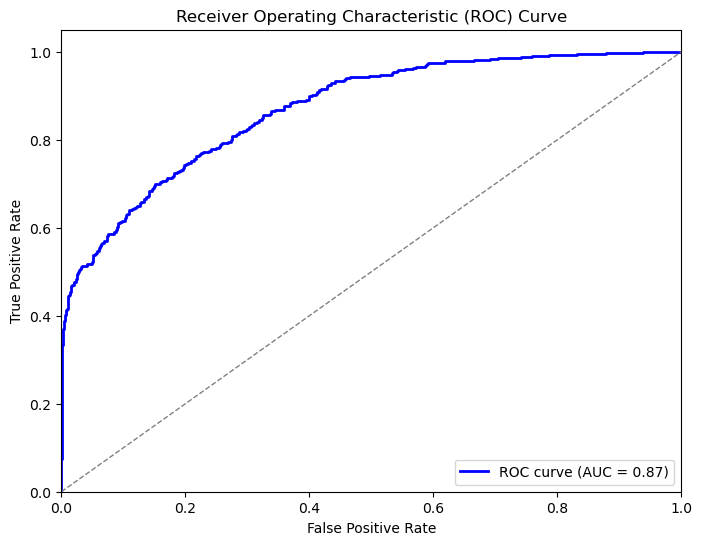

In [76]:
# 남자 roc
# Calculate ROC curve
y_prob = XGBModel_man.predict_proba(X_man_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_man_test, y_prob)

# Calculate AUC
auc_man = roc_auc_score(y_man_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_man))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

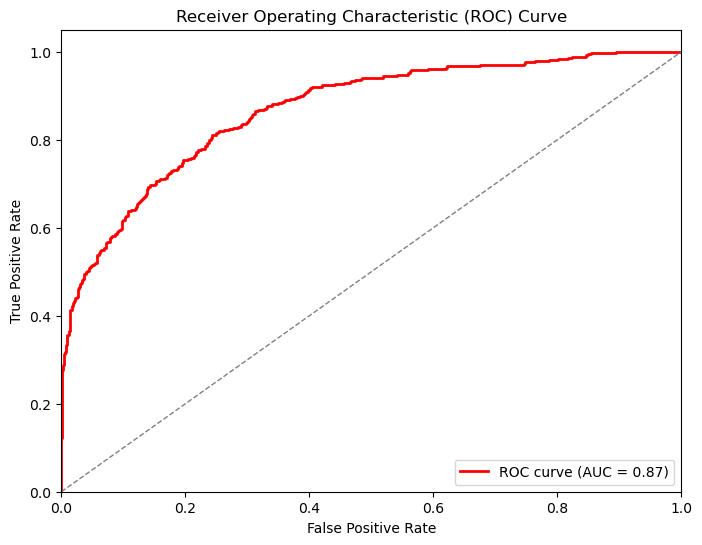

In [77]:
# 여자 roc
# Calculate ROC curve
y_prob = XGBModel_woman.predict_proba(X_woman_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_woman_test, y_prob)

# Calculate AUC
auc_woman = roc_auc_score(y_woman_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_woman))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

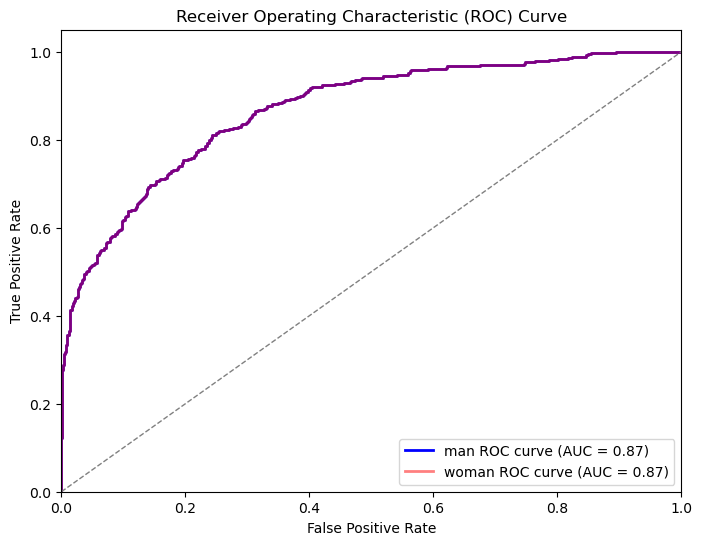

In [78]:

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='man ROC curve (AUC = {:.2f})'.format(auc_man))
plt.plot(fpr, tpr, color='red', lw=2, alpha=0.5, label='woman ROC curve (AUC = {:.2f})'.format(auc_woman))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [79]:
def features(XGBModel, X_train):
    # Assuming you have a model that provides feature importances (e.g., XGBoost)
    importances = XGBModel.feature_importances_

    # Create a DataFrame to store feature importances
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

    # Sort the DataFrame by feature importances in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    # Plot feature importances
    plt.figure(figsize=(10, 80))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot')
    plt.show()

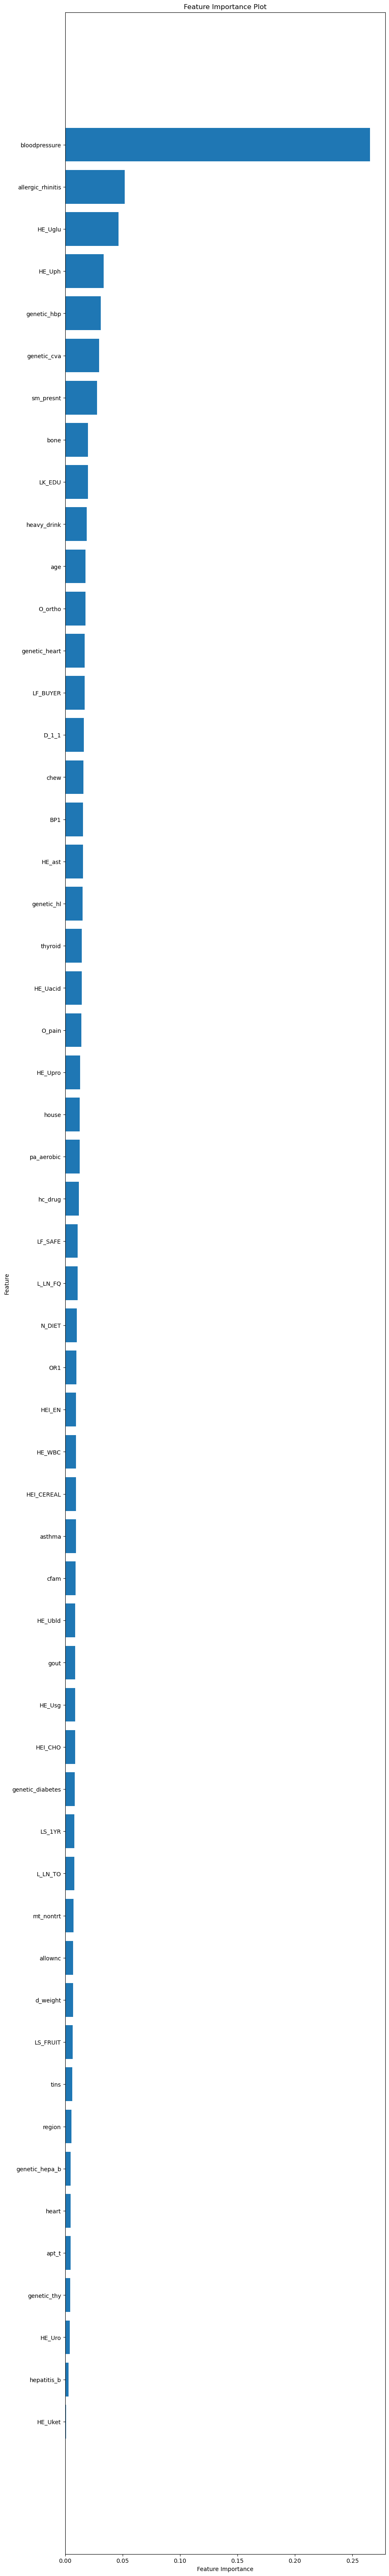

In [80]:
# 남자 모델 피쳐중요도
features(XGBModel_man, X_man_train)

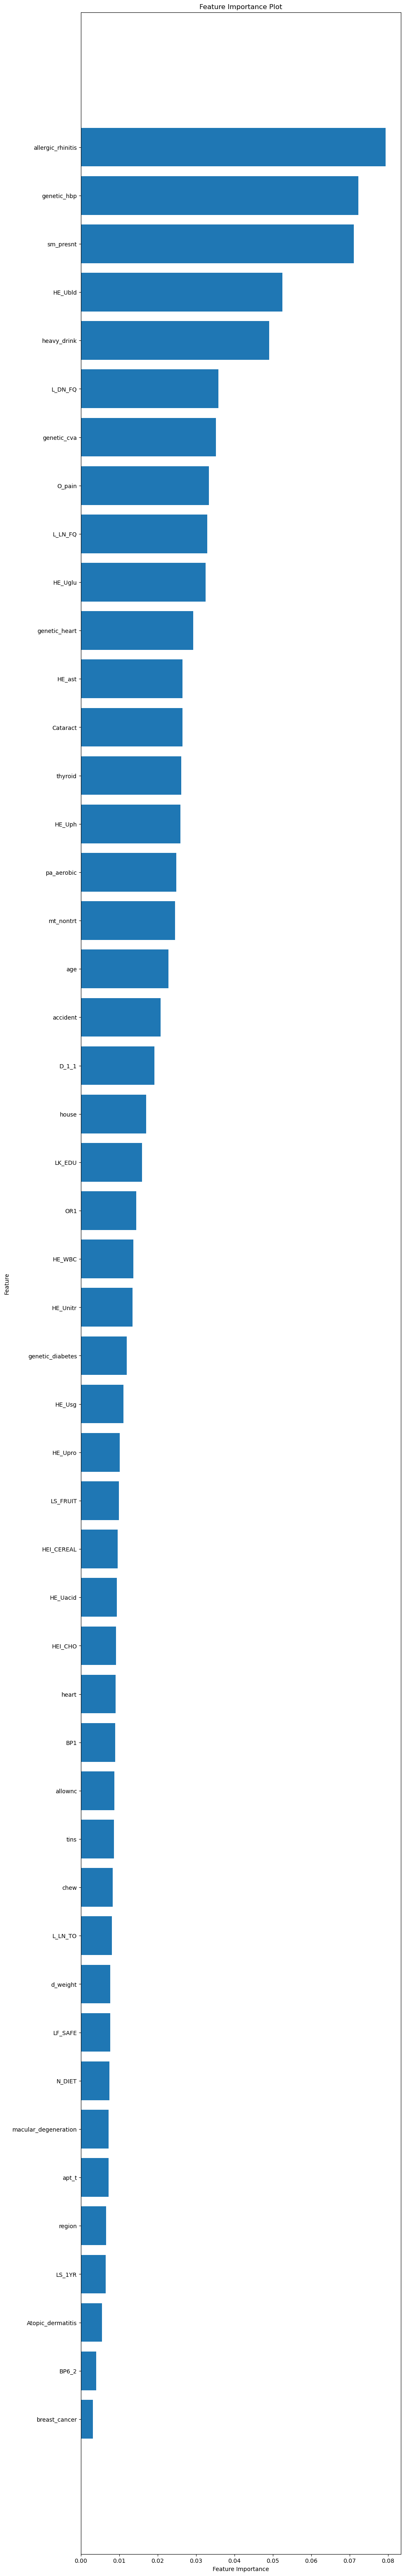

In [81]:
# 여자 모델 피쳐중요도
features(XGBModel_woman, X_woman_train)

In [82]:
# shap 남자버전
shap_values_man = shap.TreeExplainer(XGBModel_man).shap_values(X_man_test)
shap_interaction_values_man = shap.TreeExplainer(XGBModel_man).shap_interaction_values(
    X_man_test
)

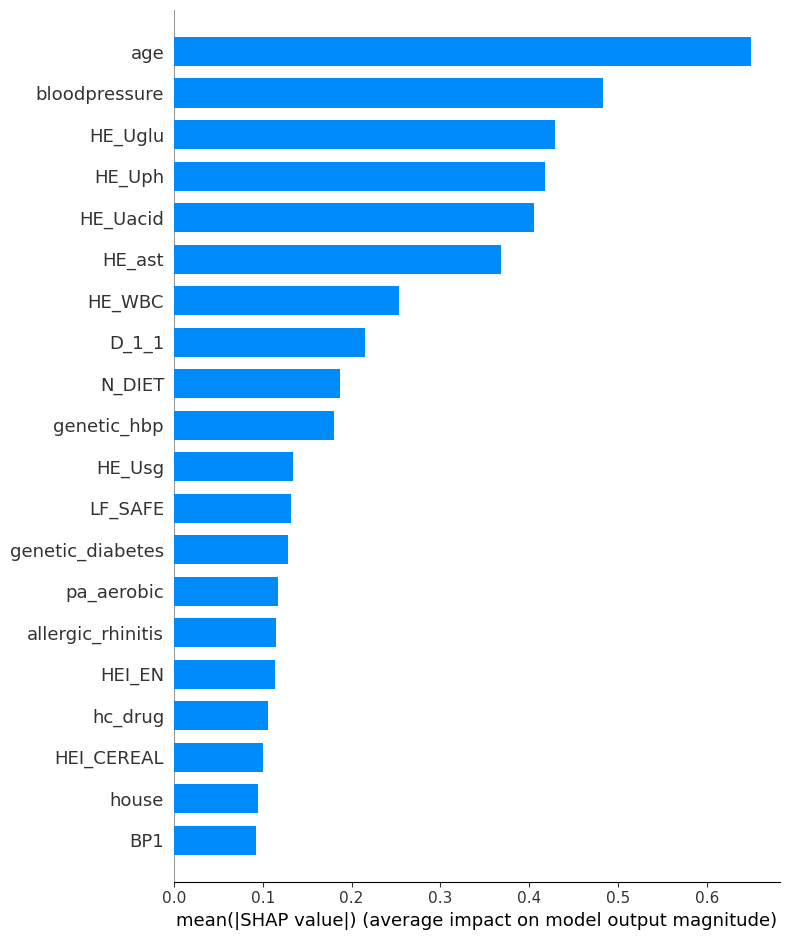

In [83]:
shap.summary_plot(shap_values_man, X_man_test, plot_type="bar")

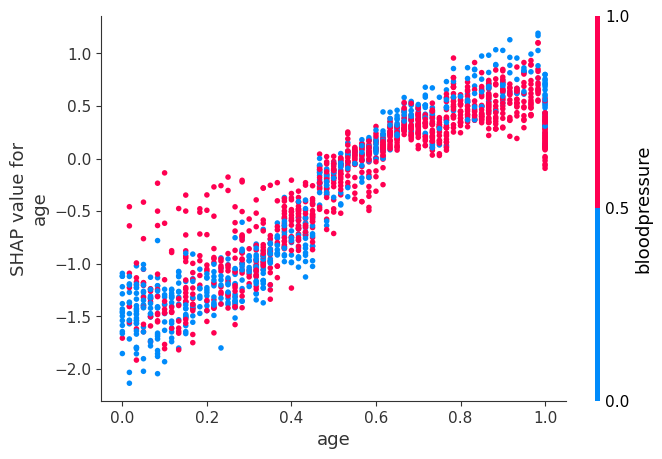

In [84]:
shap.dependence_plot('age', shap_values_man, X_man_test)

In [85]:
shap.force_plot(shap.TreeExplainer(XGBModel_man).expected_value, shap_values_man[0,:], X_man_test.iloc[0,:])

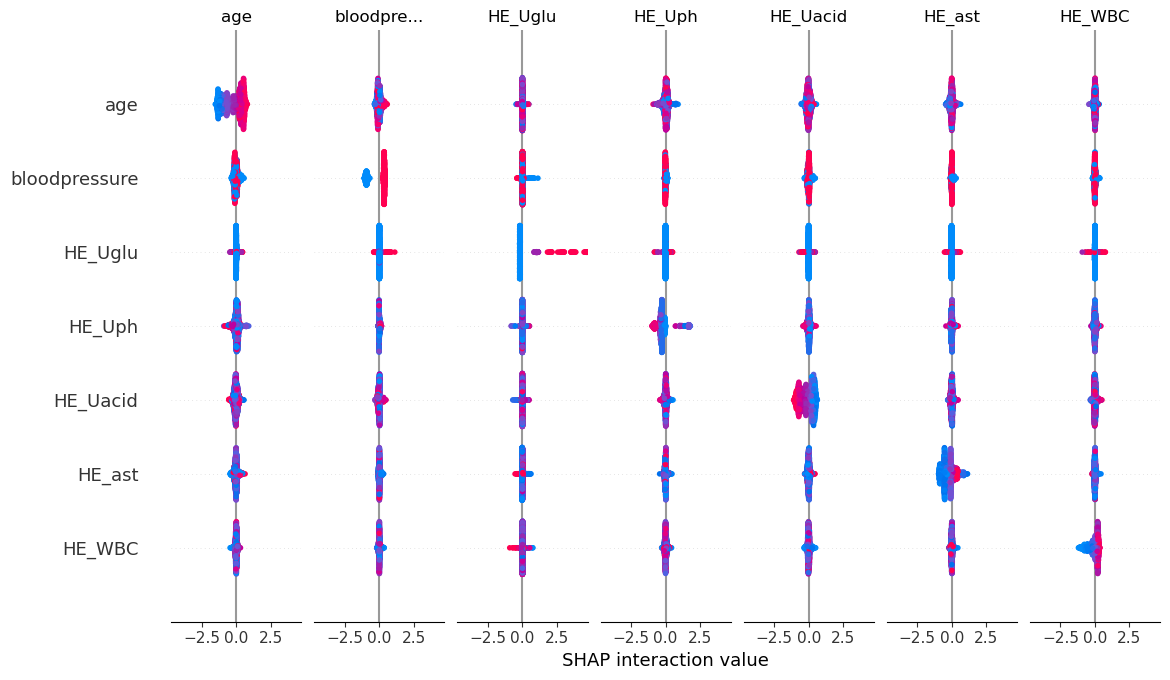

In [86]:
shap.summary_plot(shap_interaction_values_man, X_man_test)

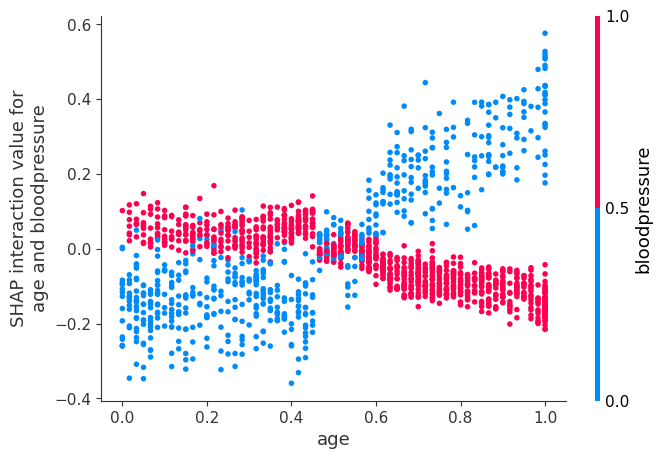

In [87]:
shap.dependence_plot(('age', 'bloodpressure'), shap_interaction_values_man, X_man_test)

In [88]:
# 남자 SHAP 값 계산
explainer_man = shap.Explainer(XGBModel_man, X_man_train)
shap_values_man = explainer_man(X_man_test)

def waterfall_plot_idx_man(i):
    index = i  # 원하는 예측의 인덱스
    shap.waterfall_plot(shap_values_man[index], max_display=20, show=False)
    plt.show()

100%|===================| 1650/1654 [00:23<00:00]        

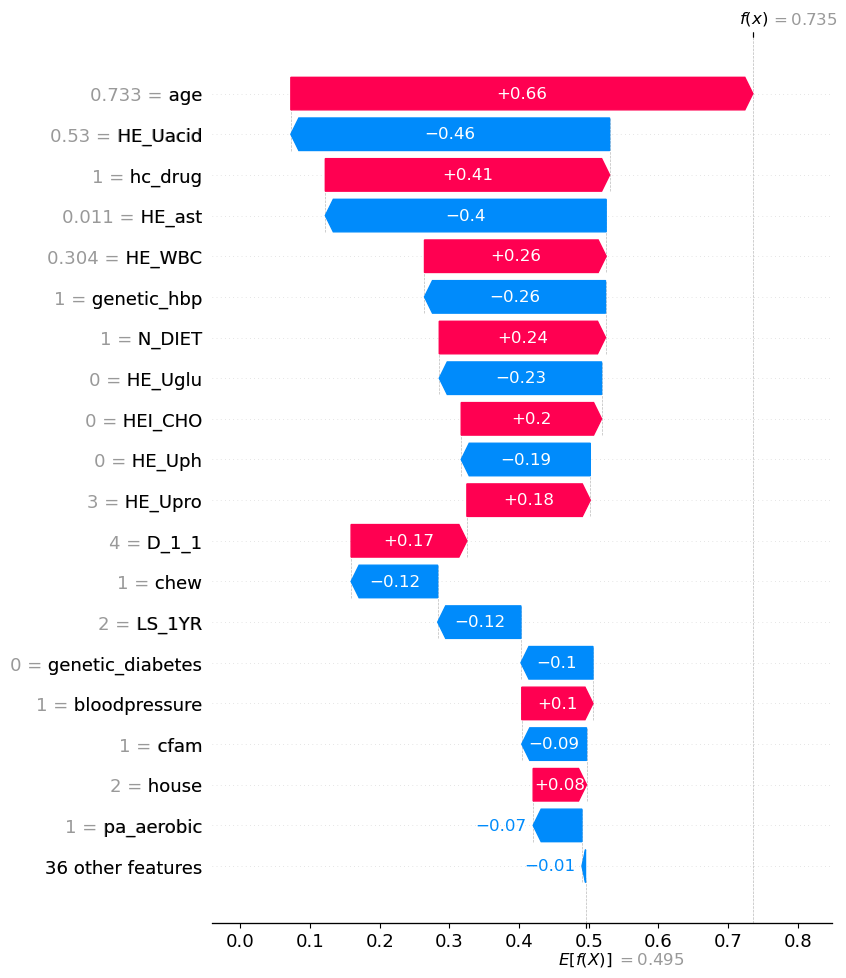

In [89]:
waterfall_plot_idx_man(1)

In [90]:
# shap 여자버전
shap_values_woman = shap.TreeExplainer(XGBModel_woman).shap_values(X_woman_test)
shap_interaction_values_woman = shap.TreeExplainer(XGBModel_woman).shap_interaction_values(
    X_woman_test
)

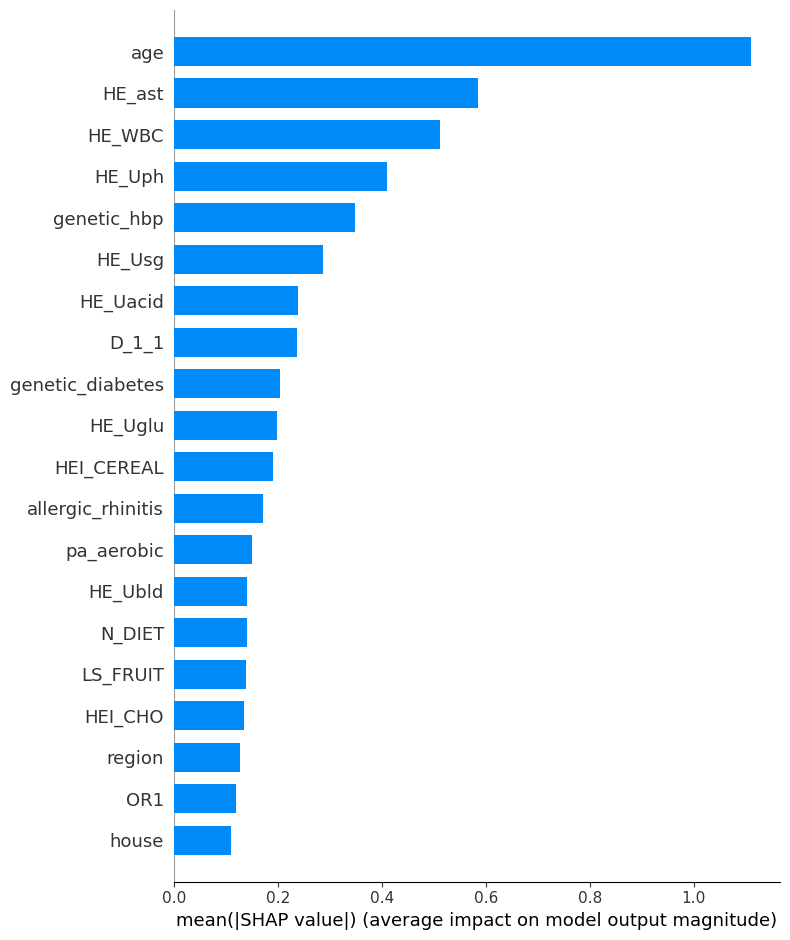

In [91]:
shap.summary_plot(shap_values_woman, X_woman_test, plot_type="bar")

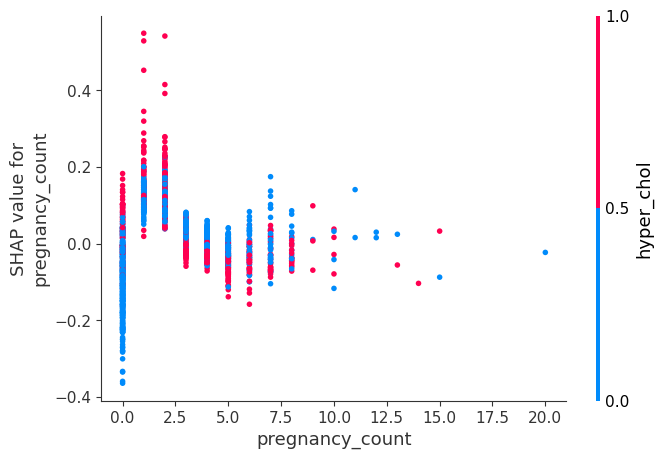

In [43]:
shap.dependence_plot('pregnancy_count', shap_values_woman, X_woman_test)

In [33]:
shap.force_plot(shap.TreeExplainer(XGBModel_woman).expected_value, shap_values_woman[0,:], X_woman_test.iloc[0,:])

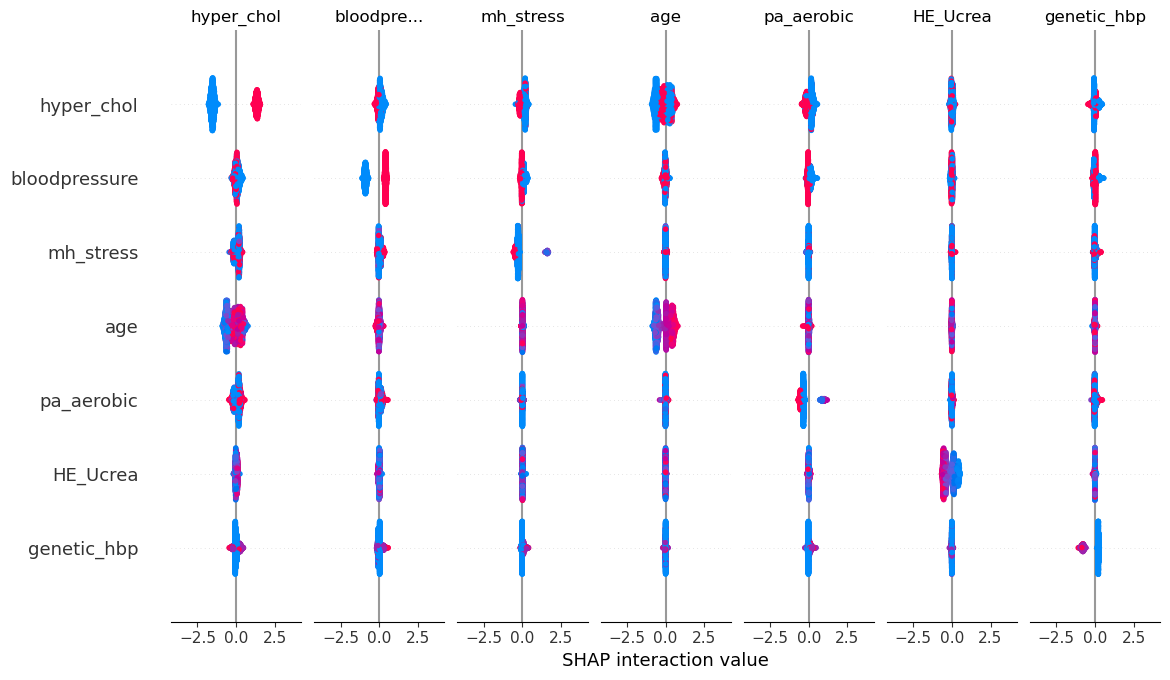

In [34]:
shap.summary_plot(shap_interaction_values_woman, X_woman_test)

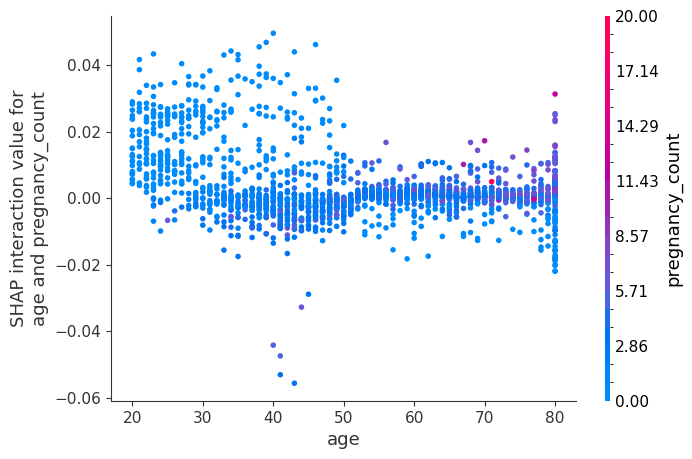

In [44]:
shap.dependence_plot(('age', 'pregnancy_count'), shap_interaction_values_woman, X_woman_test)

In [36]:
# 여자 SHAP 값 계산
explainer_woman = shap.Explainer(XGBModel_woman, X_woman_train)
shap_values_woman = explainer_woman(X_woman_test)

def waterfall_plot_idx_woman(i):
    index = i  # 원하는 예측의 s인덱스
    shap.waterfall_plot(shap_values_woman[index], max_display=20, show=False)
    plt.show()

 98%|===================| 2016/2049 [00:35<00:00]        

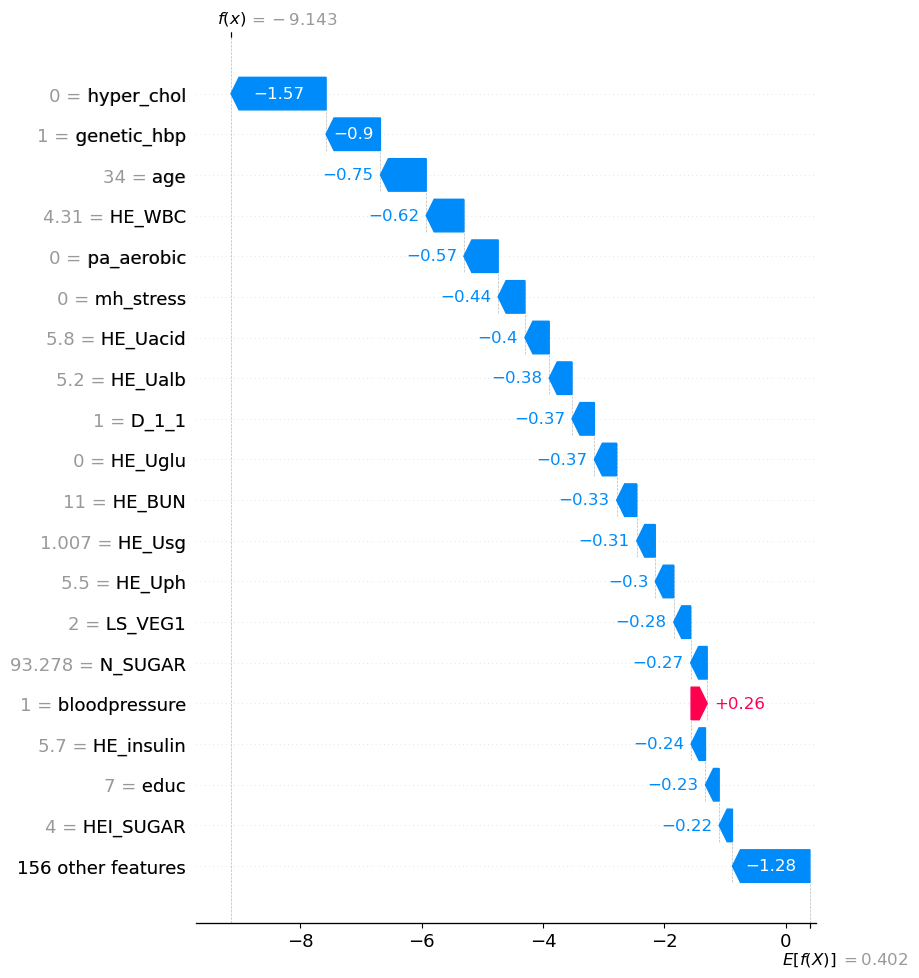

In [37]:
waterfall_plot_idx_woman(1)

In [38]:
# 여자 데이터에 여성건강, 임신 관련 데이터 추가 진행